In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [19]:
df=pd.read_excel('Analysis Data 1.xlsx')

In [20]:
df

,Sr. No.,Date,Exhibition Id,Visitor Id,Products,Payment Mode,Amount
0,1,25/Dec/2019,KOL12019,KOL1941617,Accessories,Cash,1350
1,2,25/Dec/2019,KOL12019,KOL1932365,Accessories,Cash,75000
2,3,19/Dec/2019,KOL12019,KOL1951287,Accessories,Cash,1000
3,4,18/Dec/2019,KOL12019,KOL1982621,Accessories,Cash,2000
4,5,18/Dec/2019,KOL12019,KOL1808748,Accessories,Cash,2350
...,...,...,...,...,...,...,...
2634,2635,22/Dec/2019,KOL12019,KOL1965123,Wooden Products,Cash,5500
2635,2636,25/Dec/2019,KOL12019,KOL1924811,Turkish Lamp,Cash,15000
2636,2637,22/Dec/2019,KOL12019,KOL1927587,Turkish Lamp,Cash,103990
2637,2638,16/Dec/2019,KOL12019,KOL1824228,Turkish Lamp,Cash,1600


In [21]:
df.describe(include='all')

,Sr. No.,Date,Exhibition Id,Visitor Id,Products,Payment Mode,Amount
count,2639.000000,2639,2639,2639,2639,2639,2639.000000
unique,NaN,13,1,1698,133,4,NaN
top,NaN,25/Dec/2019,KOL12019,KOL1832746,Suits,Cash,NaN
freq,NaN,377,2639,20,413,2447,NaN
mean,1320.000000,NaN,NaN,NaN,NaN,NaN,7861.066313
std,761.958004,NaN,NaN,NaN,NaN,NaN,15743.689785
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,660.500000,NaN,NaN,NaN,NaN,NaN,1500.000000
50%,1320.000000,NaN,NaN,NaN,NaN,NaN,4000.000000
75%,1979.500000,NaN,NaN,NaN,NaN,NaN,7350.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sr. No.        2639 non-null   int64 
 1   Date           2639 non-null   object
 2   Exhibition Id  2639 non-null   object
 3   Visitor Id     2639 non-null   object
 4   Products       2639 non-null   object
 5   Payment Mode   2639 non-null   object
 6   Amount         2639 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 144.4+ KB


In [23]:
len(df['Products'].unique())

133

In [24]:
df['Products'].unique()

array(['Accessories', 'Air Cooler', 'artificial candle & lights', 'Attar',
       'Bag', 'Bathroom Essentials,Oils', 'Bedsheet', 'Belt',
       'Belt,Wallet', 'Belt,Wallet,Bag', 'Body oil', 'Carpet',
       'Ceramic ware', 'chandelier', 'Chappals', 'Chappals,Sandals',
       'Clock', 'Cloths', 'Club Booking', 'Coffee', 'Cosmetics',
       'Cotton/Silk', 'Crockery', 'Decorative lights',
       'Decorative lights,artificial candle & lights',
       'Digestives and probiotics', 'Dress material', 'Dry Fruit',
       'Duppatta', 'Electric Chair', 'electric chair', 'Electric Tandoor',
       'Etthnic Wear', 'Flavored Drinks', 'Food Mixes',
       'frames & artifacts', 'frames & artifacts,Painting', 'Fridge',
       'Fruit Juices', 'Fruits', 'Fruits,Vegetables', 'Furniture',
       'Garments', 'Garments,Accessories', 'Gems & Jewellery',
       'Gift product', 'Gym', 'gym products', 'Handicraft', 'handloom',
       'healthacare products', 'HealthCare', 'Home Appliances',
       'Home Decor', '

In [25]:
df.pivot_table(values='Products',aggfunc='count',columns='Date')

Date,13/Dec/2019,14/Dec/2019,15/Dec/2019,16/Dec/2019,17/Dec/2019,18/Dec/2019,19/Dec/2019,20/Dec/2019,21/Dec/2019,22/Dec/2019,23/Dec/2019,24/Dec/2019,25/Dec/2019
Products,112,102,278,72,125,158,138,141,225,331,373,207,377


In [26]:
products_sold=df['Products'].value_counts()
products_sold

Suits            413
Garments         360
Jamdani Saree    196
Dry Fruit        105
Massager          90
                ... 
Scarf              1
Steamer            1
Kurta,Salwar       1
Fruits             1
Kurta,Wallet       1
Name: Products, Length: 133, dtype: int64

In [36]:
df_products = df.groupby(by='Products', as_index=False).agg({'Sr. No.': pd.Series.nunique})

In [38]:
type(df_products)

pandas.core.frame.DataFrame

In [48]:
df_products.columns=['Products','Count']

In [49]:
df_products

,Products,Count
0,Accessories,6
1,Air Cooler,20
2,Attar,17
3,Bag,46
4,"Bathroom Essentials,Oils",1
...,...,...
128,"scarfs,Suits,Kurta",2
129,"scarfs,Suits,Kurta,Saree,kurti,Shirts",1
130,shoe rack,3
131,textile product,8


In [63]:
df_products['Count'].mean()

19.842105263157894

In [64]:
df_products['Count'].median()

6.0

In [65]:
max(df_products['Count'])

413

In [66]:
min(df_products['Count'])

1

## Dividing Product into Categories as per Sale Counts

In [123]:
bins=[0,30,100,150,200,450]
group=['very low sales','low sales','Average sales','high sales','very high sales']

In [124]:
df_products['SalesBin']=pd.cut(df_products['Count'],bins,labels=group)

In [125]:
df_vlow_sales_product=df_products[df_products['SalesBin']=='very low sales']
df_low_sales_product=df_products[df_products['SalesBin']=='low sales']
df_avg_sales_product=df_products[df_products['SalesBin']=='Average sales']
df_high_sales_product=df_products[df_products['SalesBin']=='high sales']
df_vhigh_sales_product=df_products[df_products['SalesBin']=='very high sales']

In [126]:
df_vlow_sales_product

,Products,Count,SalesBin
0,Accessories,6,very low sales
1,Air Cooler,20,very low sales
2,Attar,17,very low sales
4,"Bathroom Essentials,Oils",1,very low sales
5,Bedsheet,26,very low sales
...,...,...,...
128,"scarfs,Suits,Kurta",2,very low sales
129,"scarfs,Suits,Kurta,Saree,kurti,Shirts",1,very low sales
130,shoe rack,3,very low sales
131,textile product,8,very low sales


In [127]:
df_low_sales_product

,Products,Count,SalesBin
3,Bag,46,low sales
10,Carpet,62,low sales
33,Fruit Juices,40,low sales
36,Furniture,71,low sales
44,Home Appliances,83,low sales
59,Massager,90,low sales
84,Saree,38,low sales
92,Sofa cum bed,64,low sales
95,Steam Irons,77,low sales
111,Wood furniture,36,low sales


In [128]:
df_avg_sales_product

,Products,Count,SalesBin
25,Dry Fruit,105,Average sales


In [129]:
df_high_sales_product

,Products,Count,SalesBin
48,Jamdani Saree,196,high sales


In [130]:
df_vhigh_sales_product

,Products,Count,SalesBin
37,Garments,360,very high sales
97,Suits,413,very high sales


## Analyzing each product division as per categories

In [131]:
## very high division

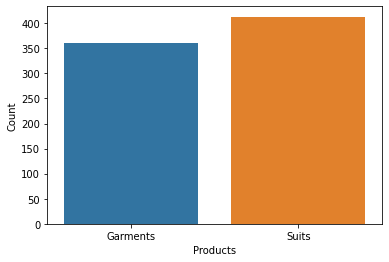

In [133]:
sns.barplot(x='Products',y='Count',data=df_vhigh_sales_product)

In [144]:
df_vhigh_sales_product.mean()

Count    386.5
dtype: float64

In [145]:
df_vhigh_sales_product.median()

Count    386.5
dtype: float64

In [136]:
## high division - nothing to compare since one product comes into this category

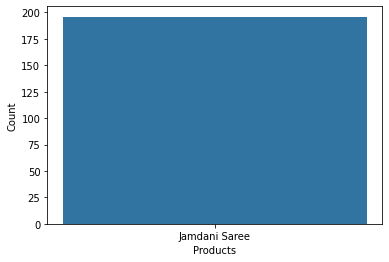

In [137]:
sns.barplot(x='Products',y='Count',data=df_high_sales_product)

In [138]:
## Average division- nothing to compare since one product comes into this category too

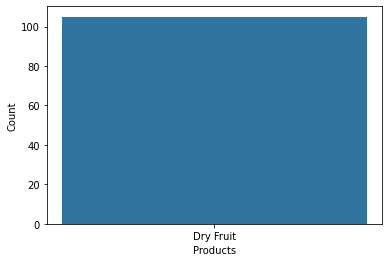

In [139]:
sns.barplot(x='Products',y='Count',data=df_avg_sales_product)

In [140]:
## low division

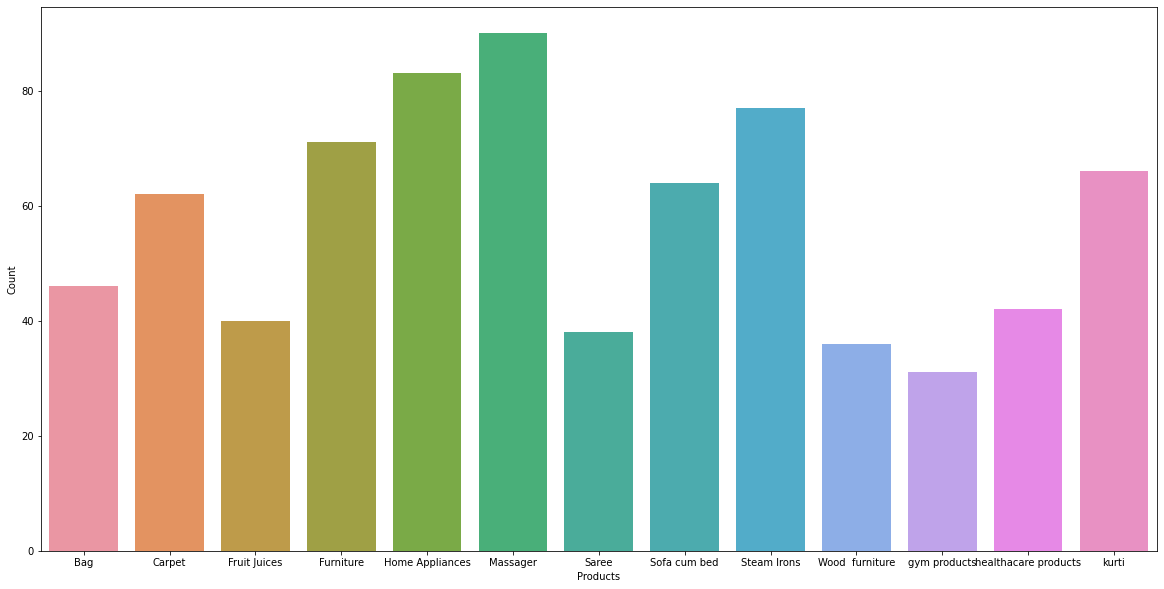

In [151]:
sns.barplot(x='Products',y='Count',data=df_low_sales_product)
plt.gcf().set_size_inches(20,10)

In [152]:
df_low_sales_product.mean()

Count    57.384615
dtype: float64

In [153]:
df_low_sales_product.median()

Count    62.0
dtype: float64

In [150]:
df_low_sales_product.iloc[np.argmax(df_low_sales_product['Count'])]['Products']

'Massager'

In [173]:
df_low_sales_product.sort_values(by=["Count"],ascending=False)[:5] 

,Products,Count,SalesBin
59,Massager,90,low sales
44,Home Appliances,83,low sales
95,Steam Irons,77,low sales
36,Furniture,71,low sales
123,kurti,66,low sales


In [154]:
#So, low division is quiet normally distributed  

In [155]:
##  very low division -had to be divided further into 2 sections 

In [158]:
df_vlow_sales_product_notconsidered=df_vlow_sales_product[df_vlow_sales_product['Count']<10]
df_vlow_sales_product_considered=df_vlow_sales_product[df_vlow_sales_product['Count']>=10]


In [159]:
df_vlow_sales_product_notconsidered

,Products,Count,SalesBin
0,Accessories,6,very low sales
4,"Bathroom Essentials,Oils",1,very low sales
6,Belt,6,very low sales
7,"Belt,Wallet",1,very low sales
8,"Belt,Wallet,Bag",4,very low sales
...,...,...,...
128,"scarfs,Suits,Kurta",2,very low sales
129,"scarfs,Suits,Kurta,Saree,kurti,Shirts",1,very low sales
130,shoe rack,3,very low sales
131,textile product,8,very low sales


In [160]:
df_vlow_sales_product_considered

,Products,Count,SalesBin
1,Air Cooler,20,very low sales
2,Attar,17,very low sales
5,Bedsheet,26,very low sales
9,Body oil,18,very low sales
14,Clock,11,very low sales
15,Cloths,25,very low sales
18,Cosmetics,12,very low sales
19,Cotton/Silk,10,very low sales
20,Crockery,30,very low sales
26,Duppatta,10,very low sales


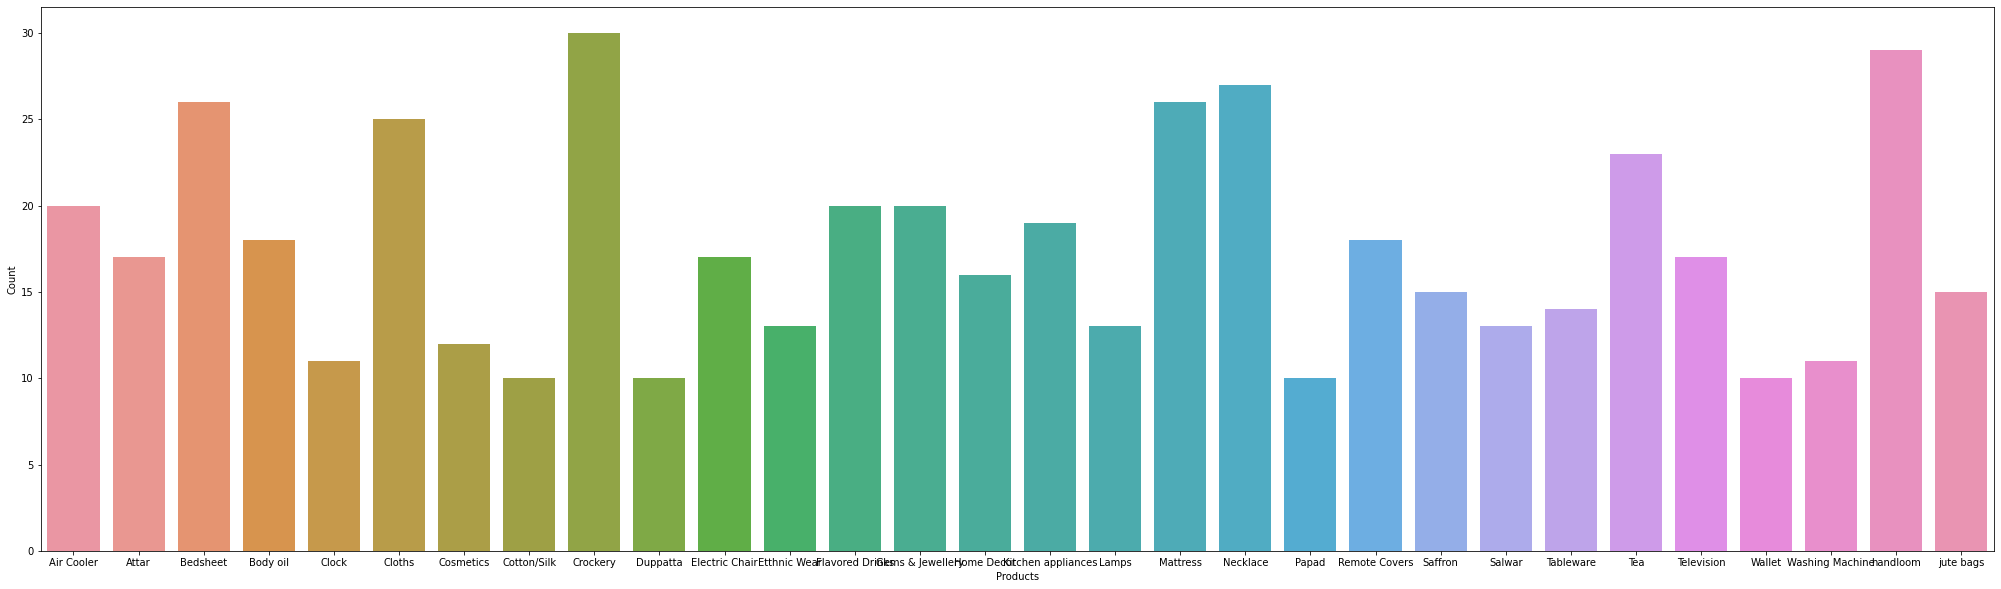

In [167]:
sns.barplot(x='Products',y='Count',data=df_vlow_sales_product_considered)
plt.gcf().set_size_inches(35,10)

In [163]:
df_vlow_sales_product_considered.mean()

Count    17.5
dtype: float64

In [164]:
df_vlow_sales_product_considered.median()

Count    17.0
dtype: float64

In [168]:
df_vlow_sales_product_considered.iloc[np.argmax(df_vlow_sales_product_considered['Count'])]['Products']

'Crockery'

In [171]:
df_vlow_sales_product_considered.sort_values(by=["Count"],ascending=False)[:5]  ## top 5 in vlow sales worth to be showcased as conssidered in low sale counts

,Products,Count,SalesBin
20,Crockery,30,very low sales
119,handloom,29,very low sales
68,Necklace,27,very low sales
5,Bedsheet,26,very low sales
61,Mattress,26,very low sales


In [172]:
#So, very low division considered part  is quiet normally distributed  

## Conclusion

<h2>In conclusion, I have divided my search of finding the product to be kept in  exhibition in a stall into 5 divisions (as per sale counts):</h2>
<ol>
    <li> very low sale count-a)considerable , b) not considerable</li>
<li> low sale count</li>
 <li> average sale count</li>
 <li> high sale count</li>
 <li> very high sale count</li>
</ol> 
<h2>Findings :</h2>
<ul>
 <li> <p>So, yeah according to me the products in very high division needs to be kept in upcoming exhibitions for sure!!</p></li>
<li> <p>The sngle product in high division can be kept if it has performed quite well in previous exhibtions because then there would be a chance for growth in upcoming exhibitions </p></li>
 <li> <p>The single product in average division too can be kept if it has performed quite well in previous exhibtions because then there would be a chance for growth in upcoming exhibitions</p></li>
 <li> <p>The top 5-6 products in low division can be given a chance considering the dataset given the products in these category have outperformed many products in terms of sale counts and also the previous exhibtions record may help in selecting better products to be kept from this section considering the past record</p></li>
 <li><p>The top 2-3 products in very low division(considered part) can be given a chance if any stall remains </p></li>
 <li><p>There were many products in this section which have underperfomed and I must say that these product companies needs to develop a better strategy for gaining a place in exhibition cause they aren't performing well based on sale counts</p></li>
</ul> 
